# Start

This Notebook demonstrates the initial stage of bot. For this I use fake data(called history), generated by random numbers to test the bot. 

The first section is my example how I calculate data volume indicator. In the second section I provide couple of scenarios based on the screenshot you sent with actions and conditions. 

## Section 1 
The following code calculates the delta volume indicator and plots it. It also prints out the trading action suggested by the DeltaVolumeBot. The red line on the plot represents the delta volume indicator, and the gray dashed line represents the zero line. Based on the delta volume indicator, the bot makes a trading decision: buy, sell, or hold.

In [36]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Generate fake historical data
symbol = "AAPL"
start_date = datetime(2023, 1, 1)
delta_volume_window = 20
threshold = 0

# Generate fake data
timestamps = [start_date + timedelta(hours=i) for i in range(1000)]
volume = np.random.randint(1000, 5000, size=(1000,))
prices = np.random.uniform(100, 200, size=(1000,))
fake_data = {"symbol": symbol, "time": timestamps, "open": prices, "high": prices + 1, "low": prices - 1, "close": prices, "volume": volume}

# Convert fake data to DataFrame
history = pd.DataFrame(fake_data)
history.set_index("time", inplace=True)

In [37]:
# Print head of history data
history.head()

,symbol,open,high,low,close,volume
time,,,,,,
2023-01-01 00:00:00,AAPL,160.474581,161.474581,159.474581,160.474581,3177
2023-01-01 01:00:00,AAPL,100.921242,101.921242,99.921242,100.921242,2724
2023-01-01 02:00:00,AAPL,165.866031,166.866031,164.866031,165.866031,4455
2023-01-01 03:00:00,AAPL,104.105406,105.105406,103.105406,104.105406,2369
2023-01-01 04:00:00,AAPL,113.667785,114.667785,112.667785,113.667785,4422


In [38]:
class DeltaVolumeBot:
    
    def __init__(self, symbol, delta_volume_window, threshold):
        self.symbol = symbol # symbol represents the stock symbol for which the bot will analyze data.
        self.delta_volume_window = delta_volume_window # delta_volume_window specifies the window size (in hours) for calculating the delta volume indicator.
        self.threshold = threshold # threshold is the threshold value used for making trading decisions based on the delta volume indicator.
    
    def DeltaVolumeTrading(self, history):
        '''This method receives historical data as input and returns the action to take based on the delta volume indicator.'''
        
        if not history.empty:# checks if the historical data is not empty.
            delta_volume = history["volume"].diff().dropna() #calculates the delta volume indicator by taking the difference in volume over the specified window.
            delta_volume_avg = np.mean(delta_volume) #calculates the average delta volume.
            if delta_volume_avg > self.threshold: #If the average delta volume is greater than the threshold, it suggests buying ("Buy").
                return "Buy"
            elif delta_volume_avg < -self.threshold:
                return "Sell"
        return "Hold"

In [39]:
# Test the DeltaVolumeBot
bot = DeltaVolumeBot(symbol, delta_volume_window, threshold)
history_window = history.loc[start_date - timedelta(hours=delta_volume_window):start_date]
print(history_window)
print('----------------------------------------------------------------------------')
action = bot.DeltaVolumeTrading(history_window)
print("Action to take:", action)


           symbol        open        high         low       close  volume
time                                                                     
2023-01-01   AAPL  160.474581  161.474581  159.474581  160.474581    3177
----------------------------------------------------------------------------
Action to take: Hold


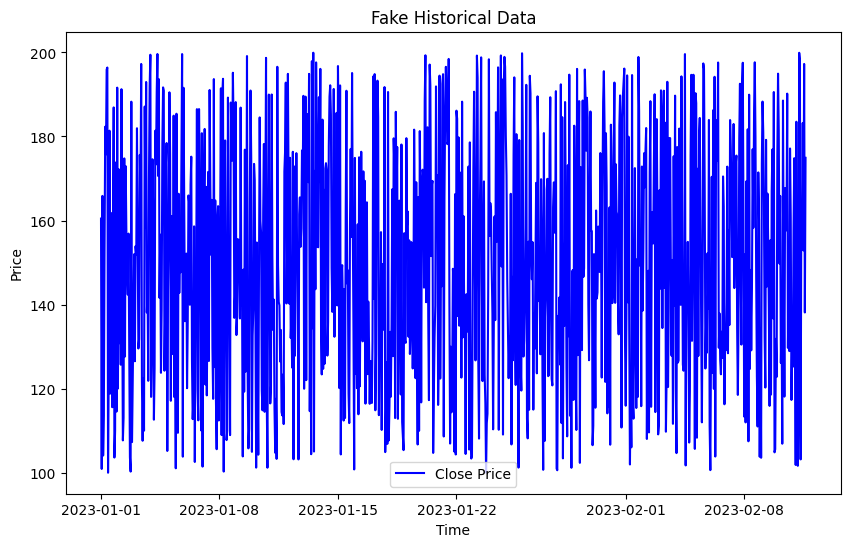

In [40]:
import matplotlib.pyplot as plt

# Plot the fake data
plt.figure(figsize=(10, 6))
plt.plot(history.index, history['close'], label='Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Fake Historical Data')
plt.legend()
plt.show()


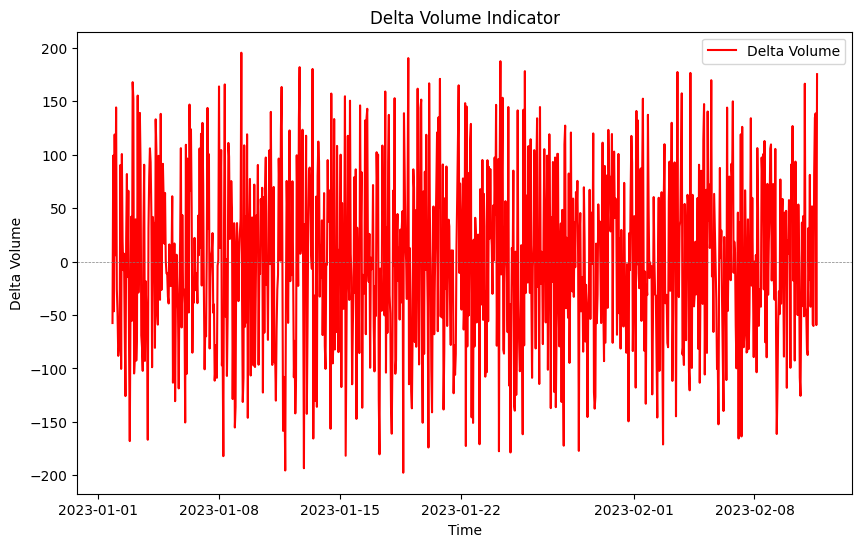

Action to take: Buy


In [41]:
# Calculate delta volume indicator
delta_volume = history['volume'].diff().rolling(window=delta_volume_window).mean()

# Plot the delta volume indicator
plt.figure(figsize=(10, 6))
plt.plot(delta_volume.index, delta_volume, label='Delta Volume', color='red')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
plt.xlabel('Time')
plt.ylabel('Delta Volume')
plt.title('Delta Volume Indicator')
plt.legend()
plt.show()

# Test the DeltaVolumeBot and visualize trading decisions
action = bot.DeltaVolumeTrading(history)
print("Action to take:", action)


## Section 2

### Scenario 1

Action: Buy
Condition: Indicator change
Adjustable Variable parameter (0 value = function Switch-off): CVD/DB
Unit: %
Parameters tab: Show it on input/parameters tab

In scenario 1, the bot will buy when there is a significant change in the delta volume indicator (CVD/DB). The parameter will be adjustable and displayed in the input/parameters tab for easy configuration. The delta volume indicator will be monitored, and if it crosses a certain threshold (e.g., 5%), the bot will execute a buy order.

In [42]:
class DeltaVolumeBot:
    
    def __init__(self, threshold):
        self.threshold = threshold
        self.position = "None"
    
    def calculate_cvd(self, volume):
        # This method calculates the Cumulative Volume Delta (CVD) based on the input volume data.
        cvd = np.cumsum(volume.diff())
        # It first calculates the difference between consecutive volume data points using volume.diff().
        # Then, it computes the cumulative sum of these differences using np.cumsum() to get the CVD.
        return cvd
    
    def execute_trade(self, cvd):
        # This method executes a trade based on the calculated CVD and the threshold value.
        # It takes the calculated CVD as input.
        if cvd[-1] > self.threshold:
            # If the last value of the CVD is greater than the threshold, it sets the position attribute to "Buy".
            self.position = "Buy"
        else:
            # Otherwise, it sets the position attribute to "None".
            self.position = "None"

In [43]:
# Test the DeltaVolumeBot with fake data
threshold = 1000  # Set threshold for delta volume indicator
bot = DeltaVolumeBot(threshold)

cvd = bot.calculate_cvd(history['volume'])
bot.execute_trade(cvd)
print("Position:", bot.position)


Position: Buy


/var/folders/f_/0smbywrn605335jxzflmvmz1s836jg/T/ipykernel_63685/103043610.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if cvd[-1] > self.threshold:


This code snippet demonstrates a basic implementation of a trading bot that uses the CVD indicator to make trading decisions based on a specified threshold. Depending on the calculated CVD value, the bot will either take a "Buy" position or remain in a "None" position.

### Scenario 2:

Action: Sell
Condition: Price change
Adjustable Variable Parameter: Ticks
Unit: Ticks
Parameters Tab: Show it on input/parameters tab
Example Explanation: Here, the bot will sell when there is a certain number of ticks change in the price, indicating a potential reversal in the market trend.

In [51]:
class PriceChangeSellBot:
    
    def __init__(self, symbol, tick_threshold):
        self.symbol = symbol
        self.tick_threshold = tick_threshold
    
    def PriceChangeTrading(self, history):
        if not history.empty:
            price_change = history["close"].diff().dropna() # calculates the price change by taking the difference between consecutive closing prices 
            print("PriceChange:", price_change)
            print('--------------------------------------')
            if abs(price_change.iloc[-1]) >= self.tick_threshold:
                #  checks if the absolute value of the most recent price change (price_change.iloc[-1]) is greater than or equal to the tick_threshold attribute of the object. If the price change exceeds the threshold, it returns "Sell", indicating that the bot should sell.
                return "Sell"
        return "Hold"

In [52]:
history

,symbol,open,high,low,close,volume
time,,,,,,
2023-01-01 00:00:00,AAPL,160.474581,161.474581,159.474581,160.474581,3177
2023-01-01 01:00:00,AAPL,100.921242,101.921242,99.921242,100.921242,2724
2023-01-01 02:00:00,AAPL,165.866031,166.866031,164.866031,165.866031,4455
2023-01-01 03:00:00,AAPL,104.105406,105.105406,103.105406,104.105406,2369
2023-01-01 04:00:00,AAPL,113.667785,114.667785,112.667785,113.667785,4422
...,...,...,...,...,...,...
2023-02-11 11:00:00,AAPL,183.222136,184.222136,182.222136,183.222136,3767
2023-02-11 12:00:00,AAPL,152.889976,153.889976,151.889976,152.889976,4756
2023-02-11 13:00:00,AAPL,197.249537,198.249537,196.249537,197.249537,4440


In [57]:
tick_threshold = 5  # Example: sell when price changes by at least 5 ticks or (0.05$(0.01 $ * 5 ticks))

In [58]:
# Instantiate PriceChangeSellBot
bot = PriceChangeSellBot(symbol, tick_threshold)

# Test PriceChangeTrading method
action = bot.PriceChangeTrading(history)
print("Action to take:", action)

PriceChange: time
2023-01-01 01:00:00   -59.553339
2023-01-01 02:00:00    64.944790
2023-01-01 03:00:00   -61.760625
2023-01-01 04:00:00     9.562379
2023-01-01 05:00:00    38.521323
                         ...    
2023-02-11 11:00:00    26.261453
2023-02-11 12:00:00   -30.332160
2023-02-11 13:00:00    44.359560
2023-02-11 14:00:00   -59.115552
2023-02-11 15:00:00    36.783196
Name: close, Length: 999, dtype: float64
--------------------------------------
Action to take: Sell
